# Historical Forecasting
I want to validate a Monte Carlo Simulation. I have a year's worth of data from a team, counting collected stories. Knowing how many stories they complete by the end of the year, I want to estimate, each sprint, what the odds are that they will complete that number of stories by the end of the year. Basically, we're back-testing the Monte Carlo simulations.

In [3]:
import urllib.parse
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [4]:

#stories_completed_each_sprint = [2,2,7,1,3,6,7,6,5,2,1,1,4,5,5,6,5,3,5,5,5,8,5,4,3,7,14,4]
stories_completed_each_sprint = [281,203,292,242,272,258,216,262,286,277,291,315,187,264,199,186,225,231,263,328,283,239,252,248,247,196]
num_simulations = 1000

In [5]:
total_sprints = len(stories_completed_each_sprint)
total_backlog = sum(stories_completed_each_sprint)
print(f"There are {total_sprints} total sprints.")
print(f"The backlog has {total_backlog} total stories.")

models_run = {}

for sprint in range(total_sprints):
    stories_completed = stories_completed_each_sprint[:sprint+1]
    print(f"We just completed sprint {sprint+1} and have finished {sum(stories_completed)} total stories:")
    print(stories_completed)
    
    backlog_size = total_backlog - sum(stories_completed)
    
    ## Set up our Monte Carlo Simulation.
    # Zero out an array with a row for each iteration of the simulation.
    sprints_to_completion = np.zeros(num_simulations)
    
    ## Run our simulations
    for j in range(num_simulations):
        # Initialize the backlog for this iteration
        remaining_backlog = backlog_size
        sprint_count = 1
    
        while remaining_backlog > 0:
            # Randomly select the number of stories completed in a sprint
            sim_stories_completed = np.random.choice(stories_completed)
            
            # Remove those stories from the backlog.
            remaining_backlog -= sim_stories_completed
            sprint_count += 1
    
        sprints_to_completion[j] = sprint_count + sprint

    models_run[sprint] = sprints_to_completion
    
    total_elements = len(sprints_to_completion)
    
    # Counting the frequency of each number
    number_counts = Counter(sprints_to_completion)
    
    # Calculating the total number of elements
    total_elements = len(sprints_to_completion)
    
    # Sorting the counts by the number
    sorted_counts = sorted(number_counts.items())
    
    # Determining column widths
    number_col_width = max(len(str(number)) for number in number_counts) + 2
    count_col_width = max(len(str(count)) for count in number_counts.values()) + 2

    # Printing the table header
    print(f"{'Number':<{number_col_width}}{'Count':<{count_col_width}}{'Percentage':<10}Running %")
    print("-" * (number_col_width + count_col_width + 20))  # Adjusting for 'Running %' and spaces 

    # Initializing the cumulative count
    cumulative_count = 0

    # Printing each row of the table with running percentage
    for number, count in sorted_counts:
        cumulative_count += count
        percentage = (count / total_elements) * 100
        running_percentage = (cumulative_count / total_elements) * 100
        
        # Check if the current number is our actual deliverable target
        if number == 28:
            # Highlight this row
            print(f"{number:<{number_col_width}}{count:<{count_col_width}}{percentage:<10.2f}{running_percentage:.2f}% ***")
        else:
            print(f"{number:<{number_col_width}}{count:<{count_col_width}}{percentage:<10.2f}{running_percentage:.2f}%")
    #print(sprints_to_completion)

There are 26 total sprints.
The backlog has 6543 total stories.
We just completed sprint 1 and have finished 281 total stories:
[281]
NumberCount PercentageRunning %
--------------------------------
24.0  1000  100.00    100.00%
We just completed sprint 2 and have finished 484 total stories:
[281, 203]
NumberCountPercentageRunning %
-------------------------------
25.0  4    0.40      0.40%
26.0  69   6.90      7.30%
27.0  446  44.60     51.90%
28.0  328  32.80     84.70% ***
29.0  145  14.50     99.20%
30.0  8    0.80      100.00%
We just completed sprint 3 and have finished 776 total stories:
[281, 203, 292]
NumberCountPercentageRunning %
-------------------------------
24.0  24   2.40      2.40%
25.0  329  32.90     35.30%
26.0  459  45.90     81.20%
27.0  176  17.60     98.80%
28.0  11   1.10      99.90% ***
29.0  1    0.10      100.00%
We just completed sprint 4 and have finished 1018 total stories:
[281, 203, 292, 242]
NumberCountPercentageRunning %
------------------------------

Sprint 1: 281 of 6543 stories complete.


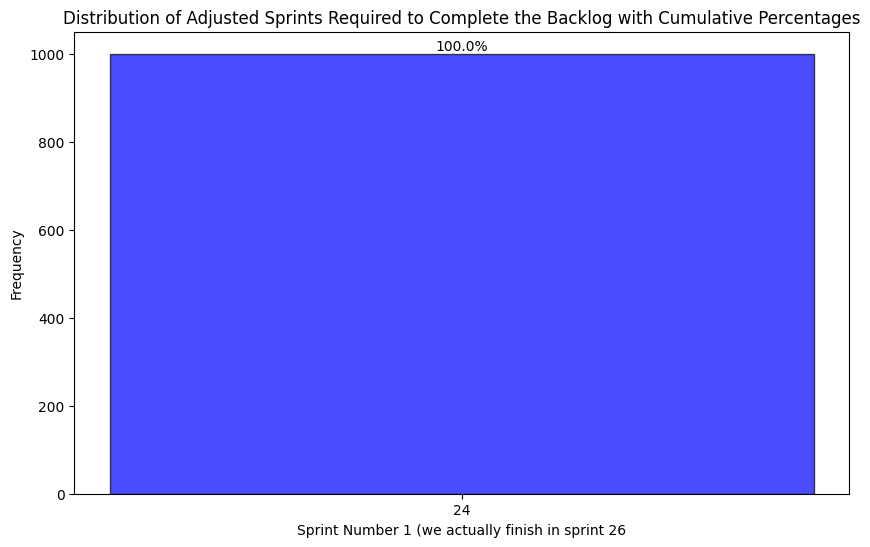

Sprint 2: 484 of 6543 stories complete.


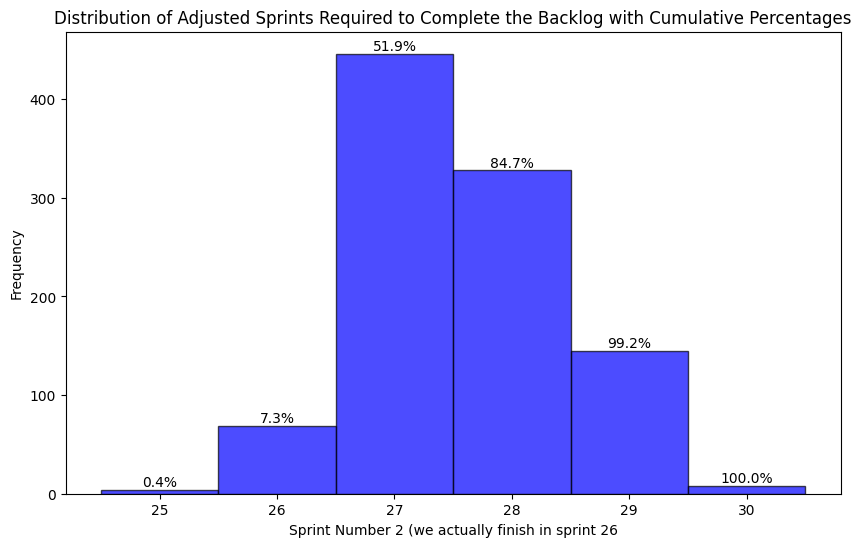

Sprint 3: 776 of 6543 stories complete.


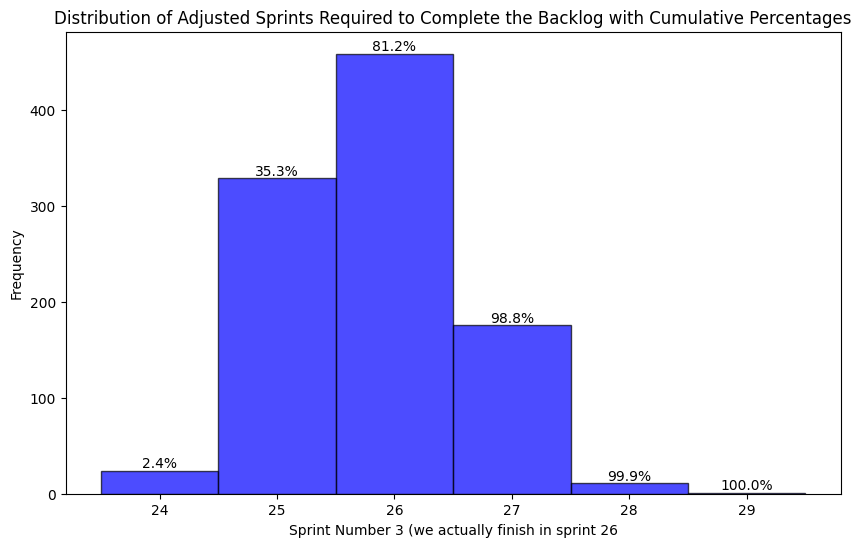

Sprint 4: 1018 of 6543 stories complete.


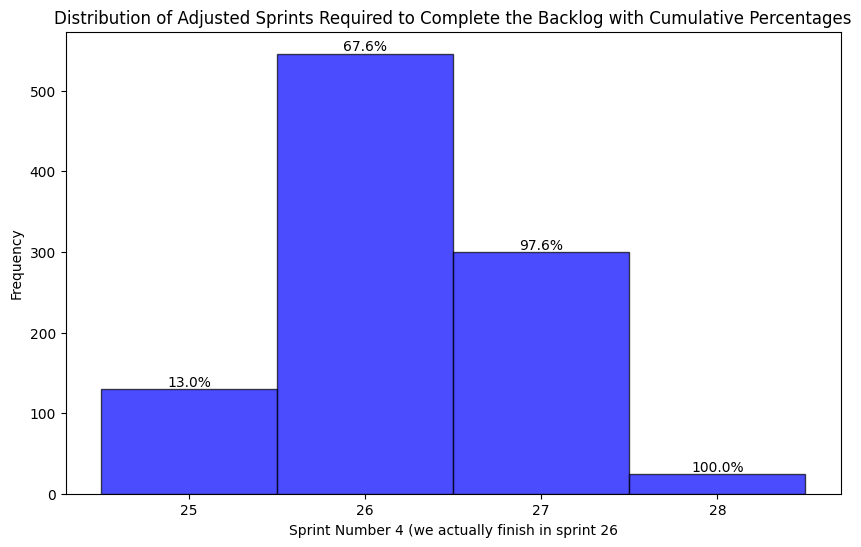

Sprint 5: 1290 of 6543 stories complete.


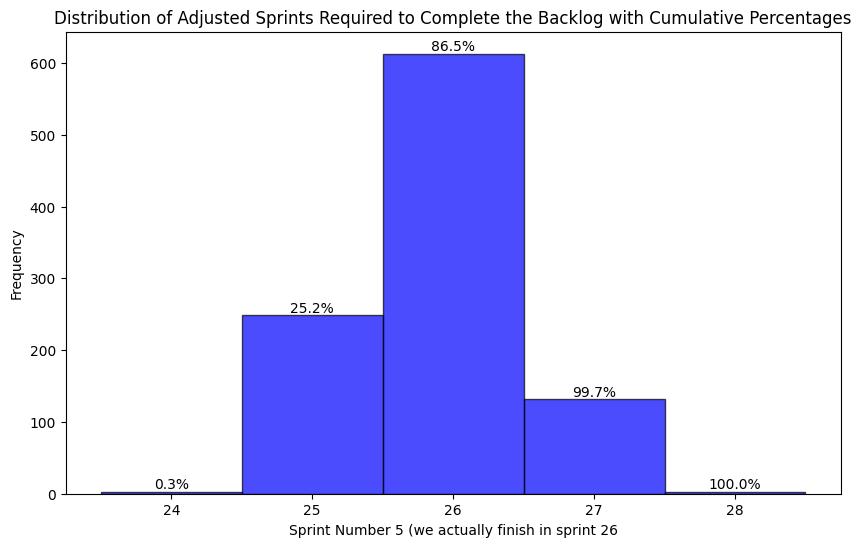

Sprint 6: 1548 of 6543 stories complete.


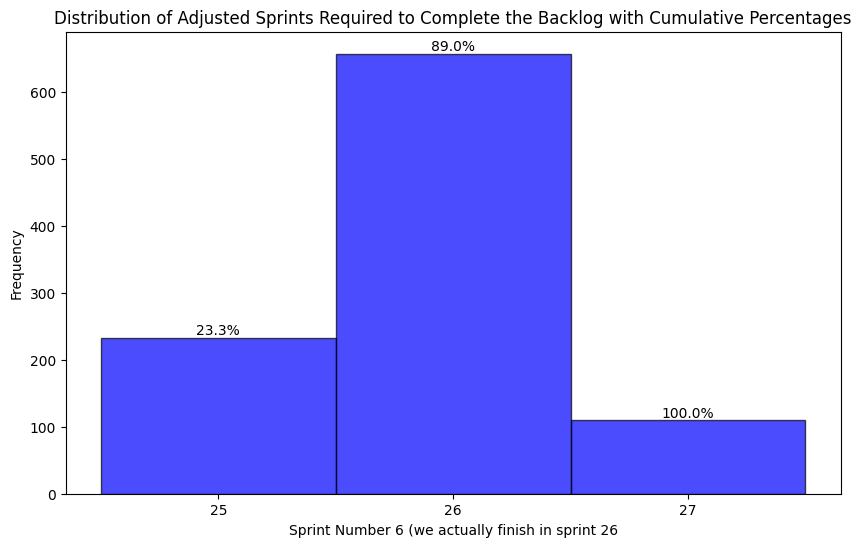

Sprint 7: 1764 of 6543 stories complete.


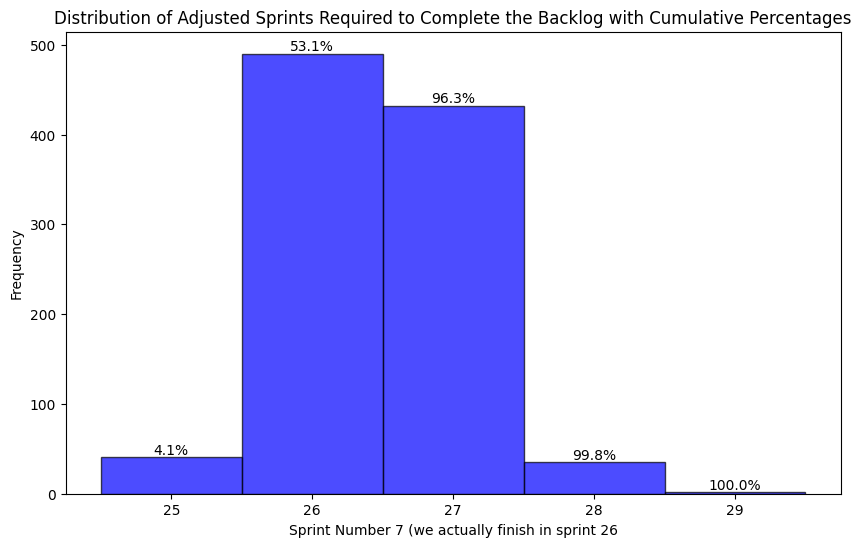

Sprint 8: 2026 of 6543 stories complete.


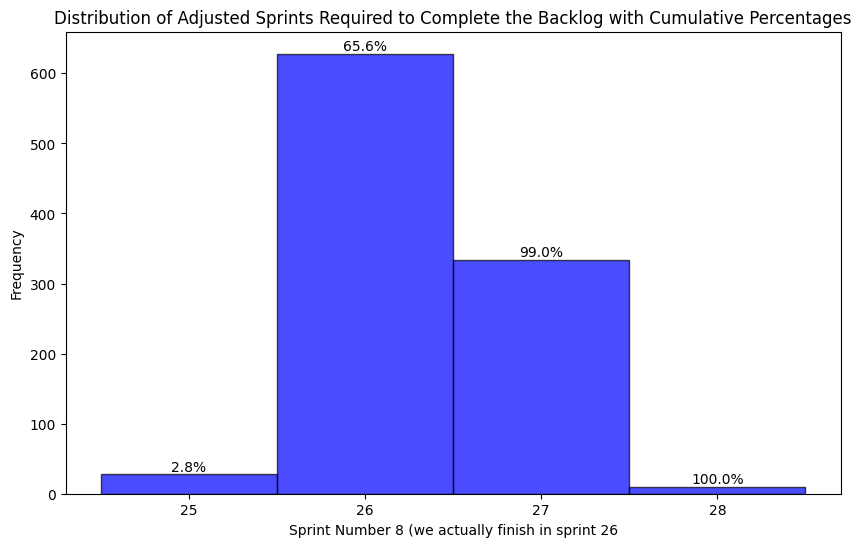

Sprint 9: 2312 of 6543 stories complete.


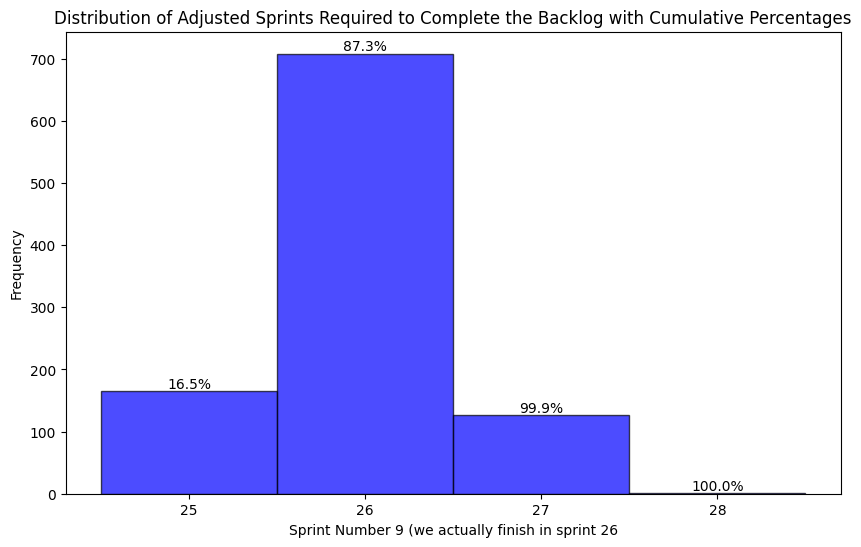

Sprint 10: 2589 of 6543 stories complete.


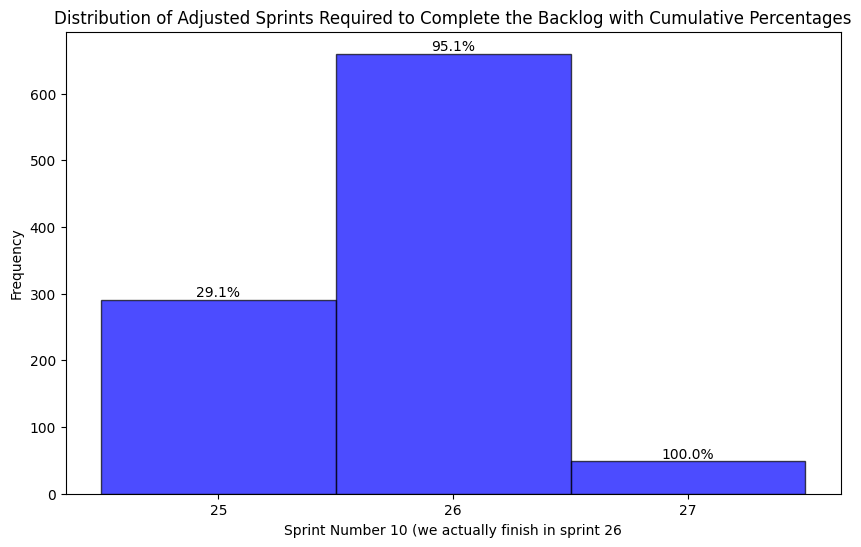

Sprint 11: 2880 of 6543 stories complete.


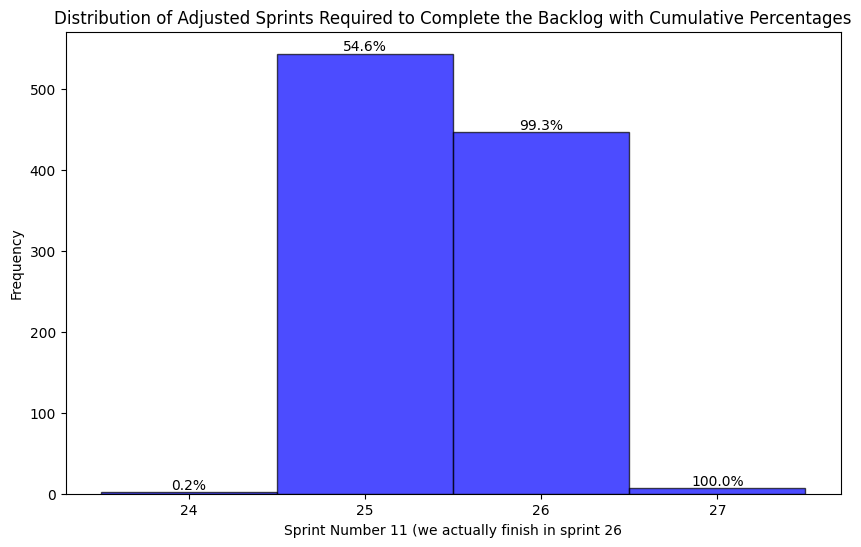

Sprint 12: 3195 of 6543 stories complete.


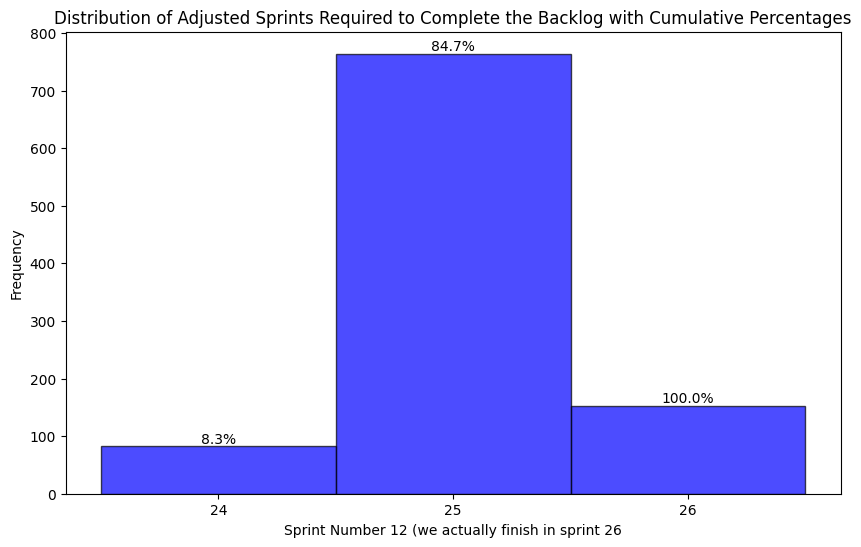

Sprint 13: 3382 of 6543 stories complete.


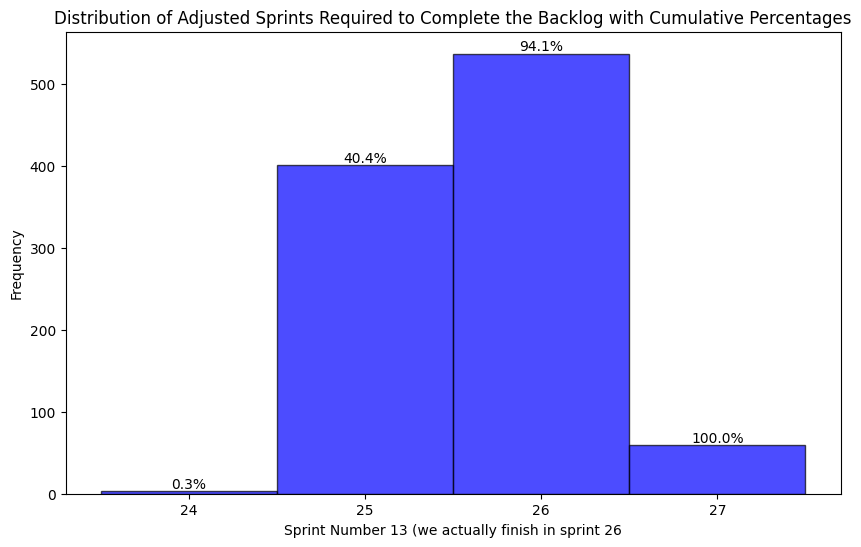

Sprint 14: 3646 of 6543 stories complete.


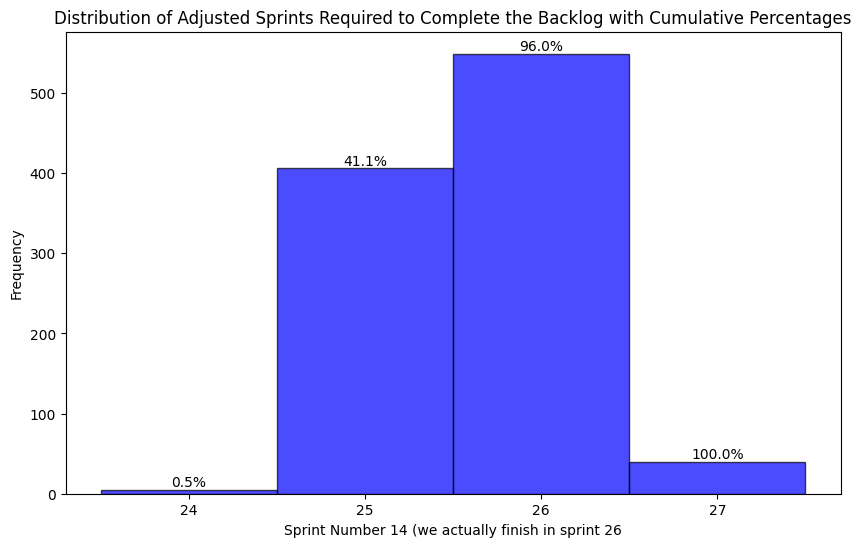

Sprint 15: 3845 of 6543 stories complete.


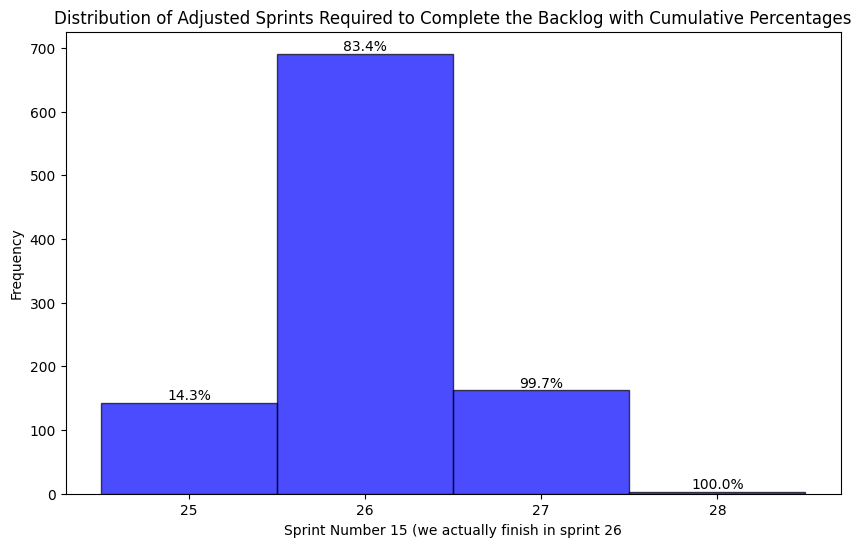

Sprint 16: 4031 of 6543 stories complete.


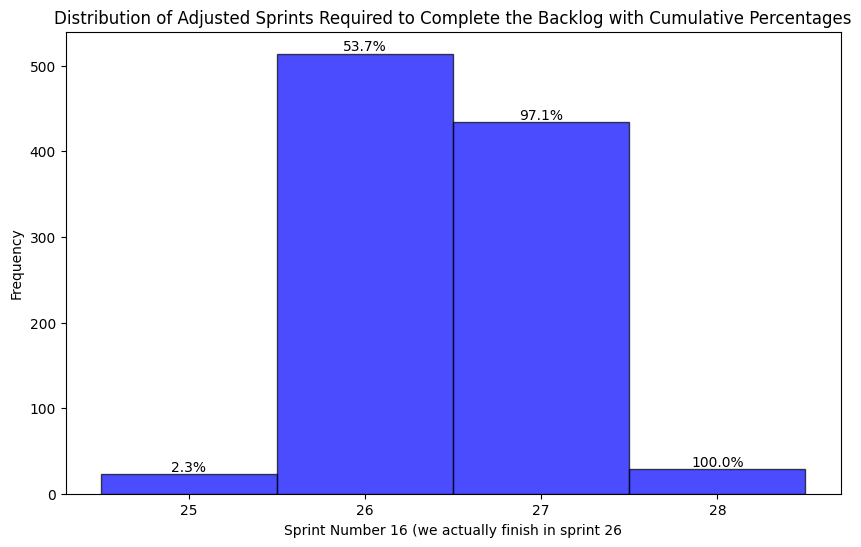

Sprint 17: 4256 of 6543 stories complete.


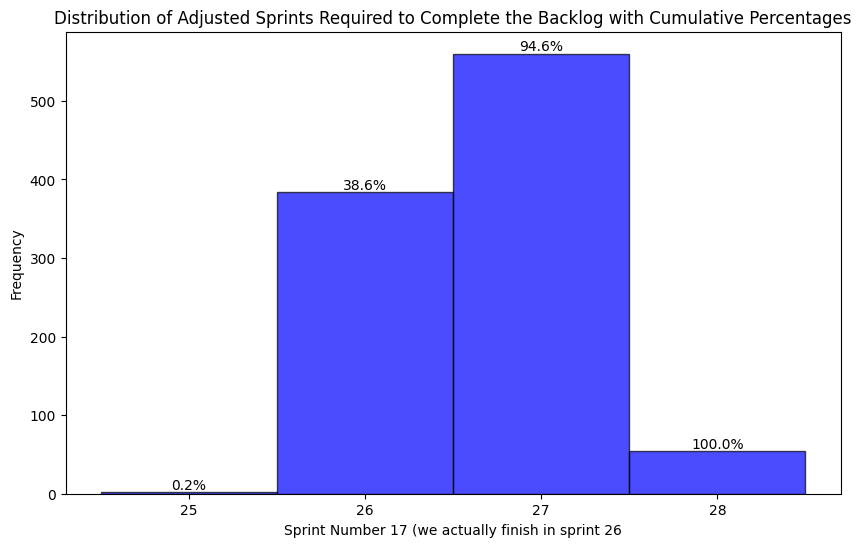

Sprint 18: 4487 of 6543 stories complete.


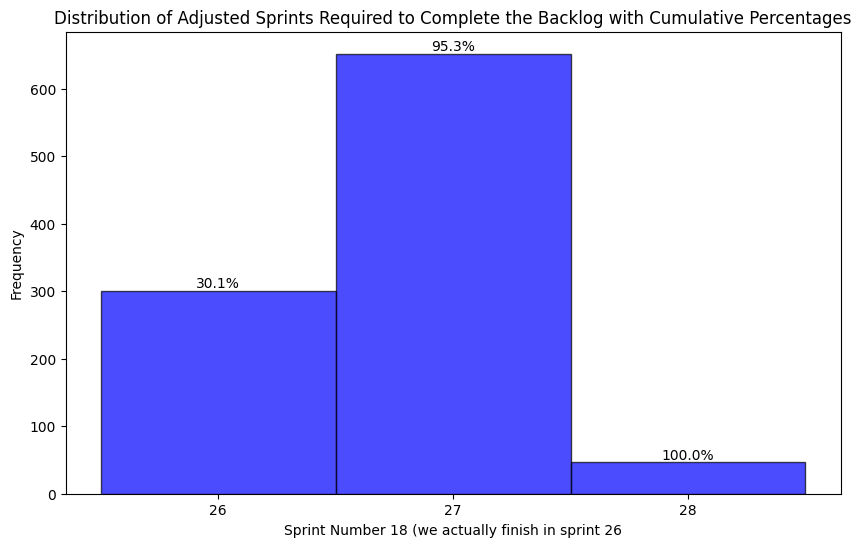

Sprint 19: 4750 of 6543 stories complete.


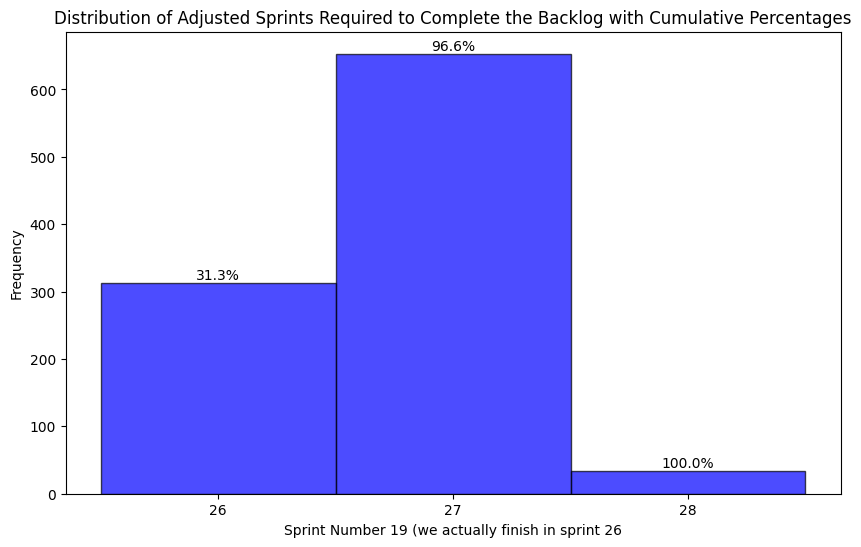

Sprint 20: 5078 of 6543 stories complete.


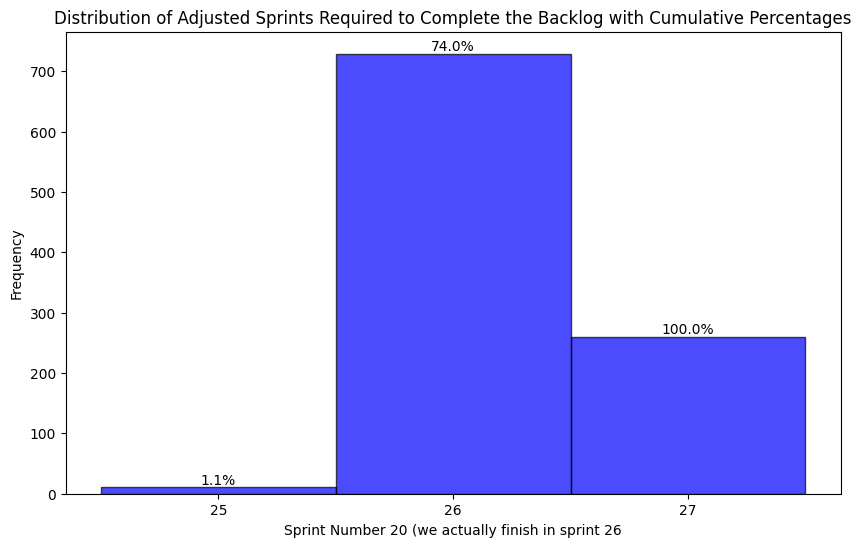

Sprint 21: 5361 of 6543 stories complete.


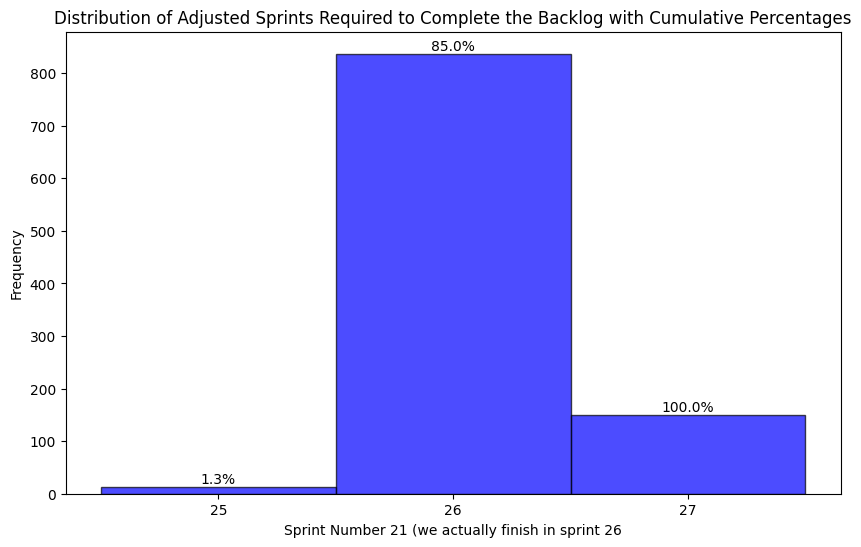

Sprint 22: 5600 of 6543 stories complete.


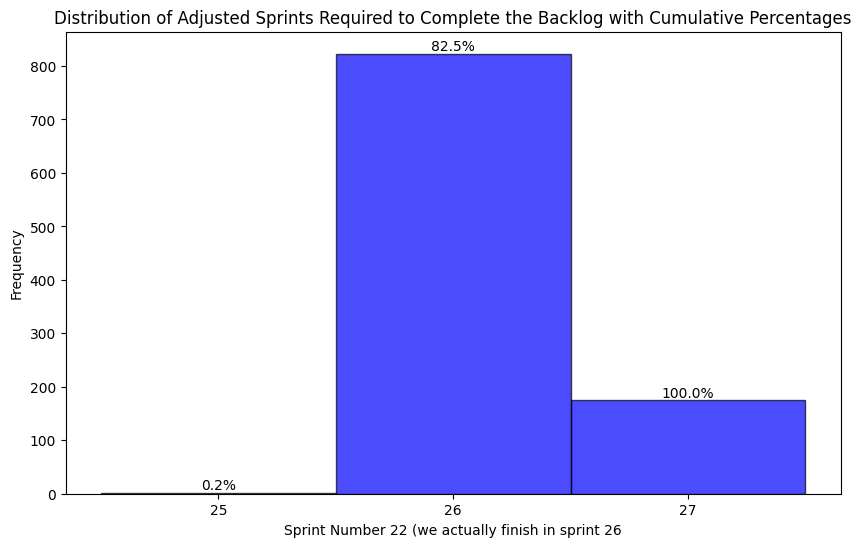

Sprint 23: 5852 of 6543 stories complete.


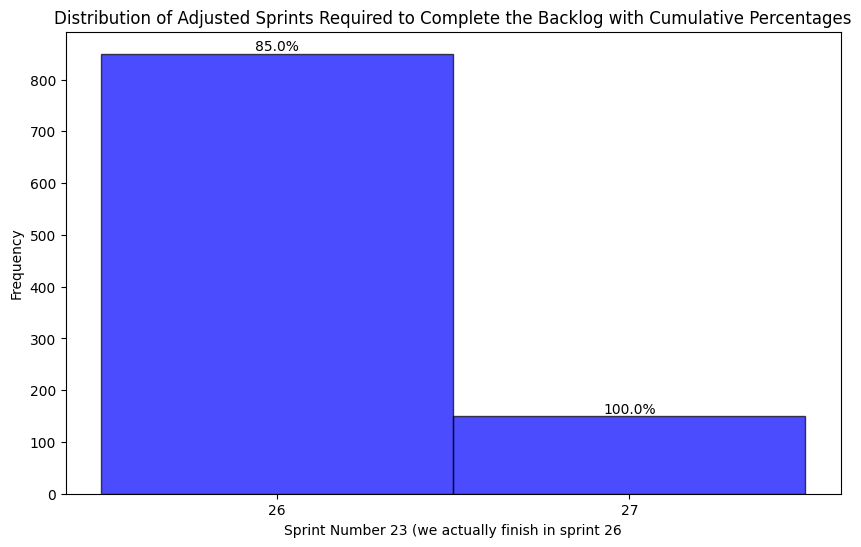

Sprint 24: 6100 of 6543 stories complete.


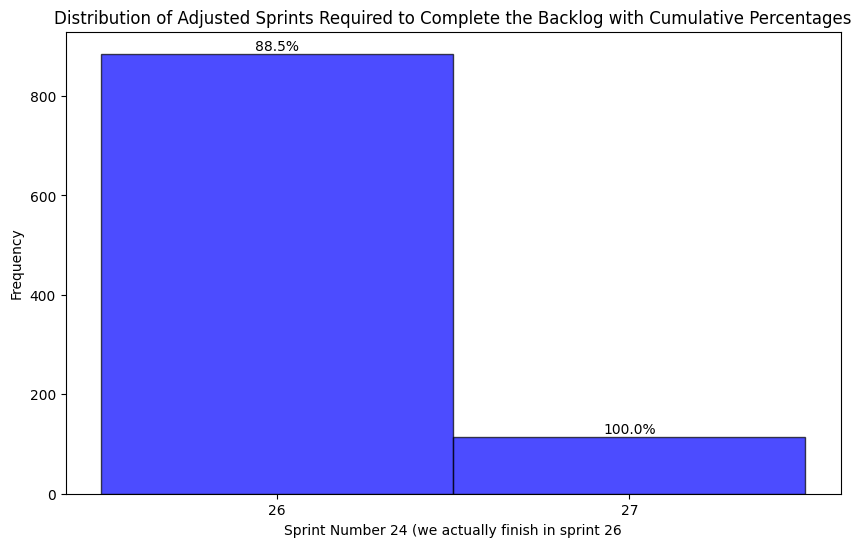

Sprint 25: 6347 of 6543 stories complete.


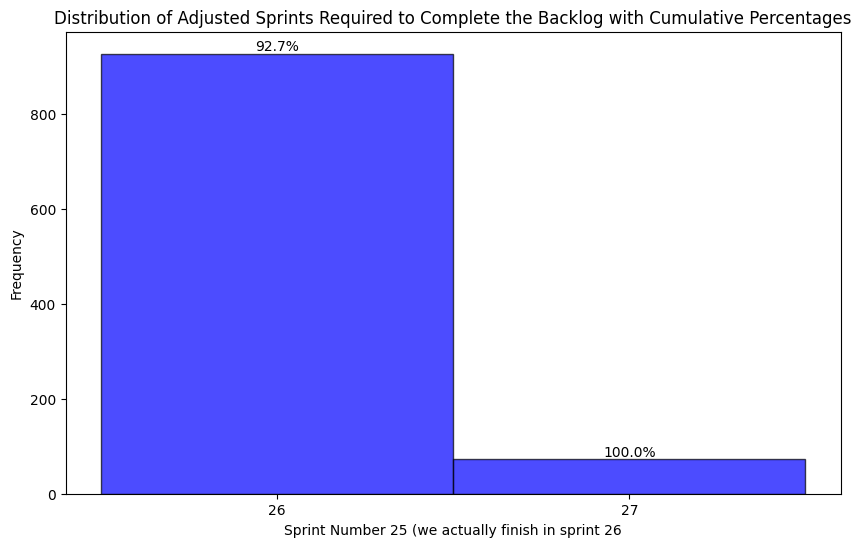

Sprint 26: 6543 of 6543 stories complete.


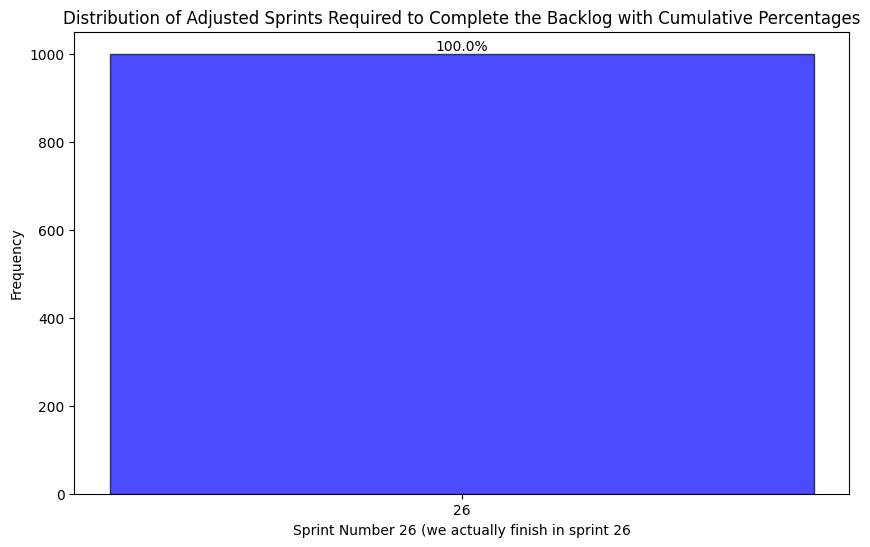

In [6]:
final_sprint = len(models_run.items())
                   
for sprint, sprint_counts in models_run.items():
    ## Graphical Analysis
    # Adjust sprints_to_completion by adding the sprint value
    stories_complete = stories_completed = stories_completed_each_sprint[:sprint+1]
    
    print(f"Sprint {sprint + 1}: {sum(stories_complete)} of {total_backlog} stories complete.")

    # Define bins: start from the minimum of adjusted_sprints, go up to the maximum plus 2
    # The '+2' ensures the last bin includes the maximum value
    non_empty_bins = np.arange(min(sprint_counts), max(sprint_counts) + 2)
        
    # Calculate histogram data
    hist, bins = np.histogram(sprint_counts, bins=non_empty_bins)
    
    # Calculate cumulative percentages
    cumulative_counts = np.cumsum(hist)
    total_counts = cumulative_counts[-1]
    cumulative_percentages = cumulative_counts / total_counts * 100
    
    # Plotting the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(sprint_counts, bins=bins, alpha=0.7, color='blue', edgecolor='black', align='left')
    
    # Annotate with cumulative percentages
    for i in range(len(cumulative_percentages)):
        plt.text(bins[i], hist[i], f'{cumulative_percentages[i]:.1f}%', ha='center', va='bottom')
    
    plt.title('Distribution of Adjusted Sprints Required to Complete the Backlog with Cumulative Percentages')
    plt.xlabel(f"Sprint Number {sprint + 1} (we actually finish in sprint {final_sprint}")
    plt.ylabel('Frequency')
    plt.xticks(bins[:-1])  # Set x-axis ticks to align with the adjusted sprint numbers
    plt.show()
